### Importing needed packages

In [5]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load the Data from CSV

In [2]:
data = pd.read_csv("Cust_Segmentation.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [6]:
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## Pre_processing

In [7]:
df = data.drop("Address", axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### Normalizing over the standard deviation

In [11]:
scl = preprocessing.StandardScaler()
x = df.values[:,1:]
x = np.nan_to_num(x)
scl = scl.fit_transform(X=x)

### KMeans Model

In [14]:
cluster = 3 
km = KMeans(init="k-means++", n_clusters=cluster, n_init=12)
km

KMeans(n_clusters=3, n_init=12)

In [17]:
km.fit(x)
c_labels = km.labels_

### We assign the labels to each row in dataframe

In [19]:
df["Cluster_KM"] = c_labels
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_KM
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2
5,6,40,1,23,81,0.998,7.831,NaN,10.9,0
6,7,38,2,4,56,0.442,0.454,0.0,1.6,1
7,8,42,3,0,64,0.279,3.945,0.0,6.6,0
8,9,26,1,5,18,0.575,2.215,NaN,15.5,1
9,10,47,3,23,115,0.653,3.947,0.0,4.0,0


In [22]:
df.groupby("Cluster_KM").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster_KM,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


### Visualization

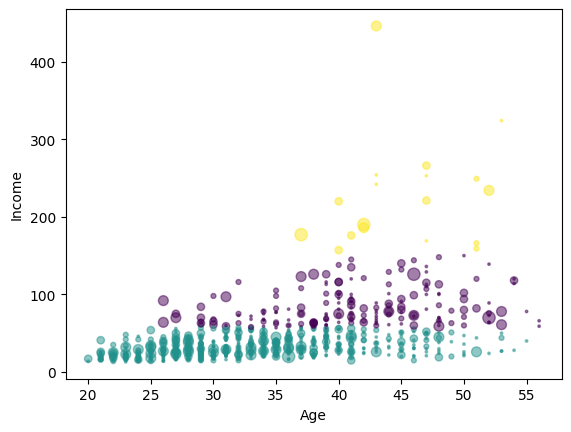

In [40]:
area = np.pi * (x[:,1]) **2

plt.scatter(x[:,0], x[:,3], s=area, c=c_labels.astype(np.float64),alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()